In [1]:
import pandas as pd
import numpy as np

## Israel-Palestine

In [2]:
csv = pd.read_csv('../csv/escalation_hostilities_israel_palestine.csv')
csv.drop(columns=['Unnamed: 8', 'Unnamed: 9'], inplace=True)
csv['date'] = pd.to_datetime(csv['date'])
csv = csv.sort_values(by='date')
csv.head()

,date,killed total,killed female,killed male,killed undefined,injured,displaced,damaged housing units
0,2023-10-07,275,6.0,269.0,0.0,NaN,NaN,NaN
1,2023-10-08,451,64.0,387.0,0.0,NaN,NaN,NaN
2,2023-10-09,681,145.0,536.0,0.0,NaN,NaN,NaN
3,2023-10-10,927,234.0,693.0,0.0,NaN,NaN,NaN
4,2023-10-11,1206,355.0,851.0,0.0,NaN,NaN,NaN


In [3]:
cols_to_fix = ['killed total', 'killed female', 'killed male', 'killed undefined', 'injured', 'displaced']
csv[cols_to_fix] = csv[cols_to_fix].diff().fillna(csv[cols_to_fix])
# Ensure no negative values (inconsistent data)
if (csv[cols_to_fix] < 0).any().any():
	csv[cols_to_fix] = csv[cols_to_fix].clip(lower=0)

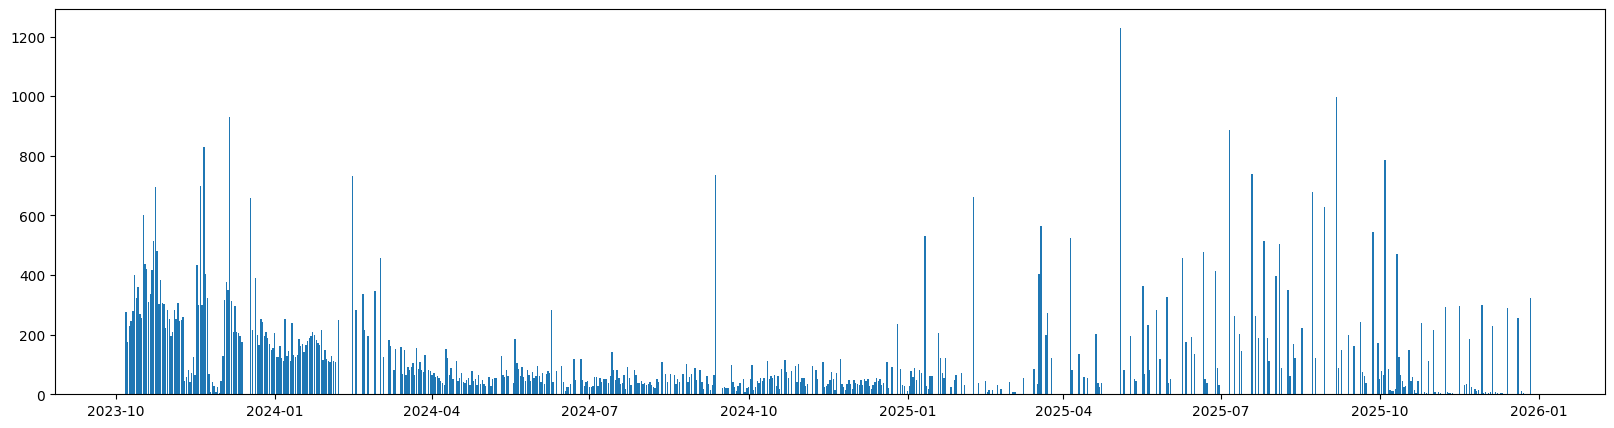

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.bar(csv['date'], csv['killed total'])
plt.show()

In [8]:
fatalities = pd.read_csv('../csv/fatalities_israelpalestine.csv')

In [10]:
columns_to_keep = ['side_a_new_id', 'side_b_new_id', 'where_description', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'date_start']
fatalities = fatalities[columns_to_keep]
fatalities.sort_values(by='date_start', inplace=True)

In [11]:
fatalities.head()

,side_a_new_id,side_b_new_id,where_description,deaths_a,deaths_b,deaths_civilians,deaths_unknown,date_start
178224,Government of Israel,Fatah,West Bank,0,0,1,1,01/01/1991 00:00:00
176696,Government of Israel,Hamas,Northern district,1,0,0,1,01/01/2001 00:00:00
177354,Government of Israel,Hamas,Gaza Strip,1,0,0,1,01/01/2008 00:00:00
177926,Government of Israel,Hamas,Gaza Strip,1,9,0,10,01/01/2009 00:00:00
177927,Government of Israel,Hamas,Gaza Strip,0,2,0,2,01/01/2009 00:00:00


In [22]:
fatalities['year'] = pd.to_datetime(fatalities['date_start']).dt.year
fatalities.head()

,side_a_new_id,side_b_new_id,where_description,deaths_a,deaths_b,deaths_civilians,deaths_unknown,date_start,year
178224,Government of Israel,Fatah,West Bank,0,0,1,1,01/01/1991 00:00:00,1991
176696,Government of Israel,Hamas,Northern district,1,0,0,1,01/01/2001 00:00:00,2001
177354,Government of Israel,Hamas,Gaza Strip,1,0,0,1,01/01/2008 00:00:00,2008
177926,Government of Israel,Hamas,Gaza Strip,1,9,0,10,01/01/2009 00:00:00,2009
177927,Government of Israel,Hamas,Gaza Strip,0,2,0,2,01/01/2009 00:00:00,2009


In [ ]:
fatalities_grouped = fatalities.groupby('year')[['deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown']].sum()

In [28]:
fatalities_grouped.to_csv('../csv/cleaned/fatalities_israelpalestine_cleaned.csv')